In [1]:
%pylab inline
import gym
import collections
import random
import numpy as np
import matplotlib.pyplot as plt

from muzero import model_torch
from muzero import game as Game
from muzero.mcts import naive_search

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(model_torch.torch.__version__)

1.9.0+cu102


In [3]:
env = gym.make('CartPole-v0')

Set Seed for Reproducibility

In [4]:
seed = 42
random.seed(seed)
np.random.seed(seed)
model_torch.set_seed(seed)
Game.random.seed(seed)
Game.np.random.seed(seed)
env.seed(seed)

[42]

In [5]:
def play_game(env, m):
    game = Game.Game(env, discount=0.997)
    while not game.terminal():
        cc = random.random()
        if (cc < 0.05):
            policy = [1 / m.action_dim] * m.action_dim
        else:
            policy = naive_search(m, game.observation, T=1)
        game.act_with_policy(policy)
    return game

In [6]:
device = 'cpu'
m = model_torch.MuModel(env.observation_space.shape, env.action_space.n, s_dim=128, K=3, lr=1e-3, device=device)
replay_buffer = Game.ReplayBuffer(50, 128, m.K)
print(env.observation_space.shape, env.action_space.n)

(4,) 2


In [7]:
rews = []

fmt = 'return: %3u, action_count: 0 (%3u) 1 (%3u), loss: %8.2f'
for j in range(30):
    game = play_game(env, m)
    replay_buffer.save_game(game)
    for i in range(20):
        m.train(replay_buffer.sample_batch())
    rew = sum(game.rewards)
    rews.append(rew)
    history = np.array(game.history)
    actions = [(history == 0).sum(), (history == 1).sum()]
    print(fmt % (rew, *actions, m.losses[-1][0]))

return:  29, action_count: 0 ( 16) 1 ( 13), loss:   252.86
return:  14, action_count: 0 ( 11) 1 (  3), loss:   124.44
return:  16, action_count: 0 (  6) 1 ( 10), loss:   143.55
return:  25, action_count: 0 ( 12) 1 ( 13), loss:   173.56
return:  11, action_count: 0 (  2) 1 (  9), loss:   210.48
return:  45, action_count: 0 ( 22) 1 ( 23), loss:   277.84
return:  18, action_count: 0 ( 10) 1 (  8), loss:   203.85
return:  30, action_count: 0 ( 15) 1 ( 15), loss:   238.98
return:  16, action_count: 0 (  6) 1 ( 10), loss:    94.64
return: 126, action_count: 0 ( 63) 1 ( 63), loss:  1131.46
return:  40, action_count: 0 ( 21) 1 ( 19), loss:   926.59
return:  41, action_count: 0 ( 20) 1 ( 21), loss:  1273.09
return: 200, action_count: 0 ( 97) 1 (103), loss:  2598.50
return: 194, action_count: 0 ( 96) 1 ( 98), loss:  4195.48
return:  41, action_count: 0 ( 24) 1 ( 17), loss:  4343.98
return:  81, action_count: 0 ( 39) 1 ( 42), loss:  3017.06
return:  54, action_count: 0 ( 27) 1 ( 27), loss:  4378.

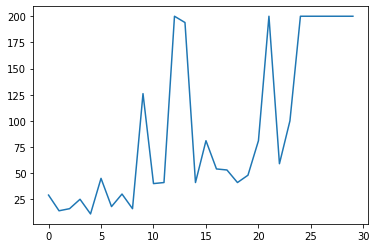

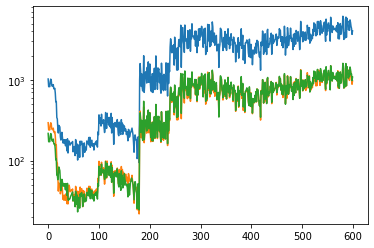

In [8]:
plot(rews)
figure()
plt.yscale('log')
plot([x[0] for x in m.losses])
plot([x[1] for x in m.losses])
plot([x[-3] for x in m.losses])

can act?

In [9]:
fmt = 'action: %1u value: %6.2f, reward: %2u, policy: [%2.1e %2.1e]'
state = env.reset()
for sn in range(2000):
    p_0 = naive_search(m, state, debug=False, T=0.1)
    #p_0, _ = mcts_search(m, state, 50)
    #print(p_0)
    
    a_1 = np.random.choice(list(range(len(p_0))), p=p_0)
    _, v_0 = m.ft(m.ht(state))
    state,r,done,_ = env.step(a_1)
    print(fmt % (a_1, v_0[0], r, p_0[0], p_0[1]))
    if done:
        print("DONE", sn)
        break

action: 1 value:  32.34, reward:  1, policy: [1.9e-15 1.0e+00]
action: 1 value:  45.02, reward:  1, policy: [9.0e-16 1.0e+00]
action: 0 value:  44.56, reward:  1, policy: [1.0e+00 2.6e-14]
action: 1 value:  48.30, reward:  1, policy: [2.7e-16 1.0e+00]
action: 0 value:  38.88, reward:  1, policy: [1.0e+00 3.8e-15]
action: 1 value:  50.63, reward:  1, policy: [2.8e-02 9.7e-01]
action: 0 value:  31.59, reward:  1, policy: [1.0e+00 4.9e-13]
action: 0 value:  46.69, reward:  1, policy: [1.0e+00 1.2e-14]
action: 1 value:  53.09, reward:  1, policy: [1.4e-13 1.0e+00]
action: 0 value:  38.67, reward:  1, policy: [1.0e+00 2.1e-15]
action: 0 value:  52.90, reward:  1, policy: [1.0e+00 7.7e-13]
action: 1 value:  57.10, reward:  1, policy: [9.0e-14 1.0e+00]
action: 0 value:  44.46, reward:  1, policy: [1.0e+00 1.2e-15]
action: 0 value:  57.76, reward:  1, policy: [1.0e+00 4.1e-08]
action: 1 value:  61.95, reward:  1, policy: [1.3e-11 1.0e+00]
action: 0 value:  49.79, reward:  1, policy: [1.0e+00 1